<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Locally_Weighted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Locally Weighted Regression (LWR) – Detailed Explanation**  

**Locally Weighted Regression (LWR)**, also called **Locally Weighted Scatterplot Smoothing (LOWESS or LOESS)**, is a **non-parametric regression** technique that fits a model locally to subsets of the data rather than using a single global model. This makes it **highly flexible** and effective for capturing non-linear relationships.

---

## **1. How LWR Works**
Instead of fitting a single global line (like in linear regression), LWR fits a **weighted linear regression** around each query point \( x \). The weights are determined by a **kernel function**, which gives more importance to points closer to \( x \).  

### **Algorithm Steps:**
1. **Choose a Query Point \( x_0 \)**:  
   - Given a dataset $ (X, y) $, choose a point $ x_0 $ where we want to estimate $ y_0 $.  

2. **Compute Weights for Each Training Point**:  
   - Assign **weights** to each data point based on its distance from $ x_0 $.  
   - The **closer** the point is to \( x_0 \), the **higher** its weight.  
   - A common **weighting function** is the Gaussian kernel:  
     $
     w_i = \exp\left(- \frac{(x_i - x_0)^2}{2\tau^2} \right)
     $
     where $ \tau $ (bandwidth) controls the decay rate of weights.  

3. **Solve a Weighted Linear Regression**:  
   - Instead of solving the usual **OLS equation**, solve a **weighted** version:  
     $
     \theta = (X^T W X)^{-1} X^T W y
     $
     where:
     - \( W \) is a **diagonal matrix** with $ w_i $ as its entries.
     - \( X \) is the matrix of feature values.
     - \( y \) is the target variable.

4. **Predict $ y_0 $**:  
   - Compute the predicted value $ \hat{y_0} = x_0^T \theta $.  

5. **Repeat for All Query Points**:  
   - Perform the above steps for **each** query point to get a smooth regression function.  

---

## **2. Key Properties of LWR**
| Property | Description |
|----------|------------|
| **Non-Parametric** | No fixed global model; fits locally at each query point. |
| **Weighting Function** | Gives higher weight to points closer to the query point. |
| **Flexibility** | Can model **non-linear** relationships easily. |
| **Computational Cost** | Expensive for large datasets since regression is computed **separately for each query point**. |
| **Bandwidth $ \tau $ Sensitivity** | The parameter $ \tau $ controls **how much locality** matters. Small $ \tau $ makes the model sensitive to noise, large $ \tau $ makes it behave like global linear regression. |

---

## **3. Choosing Bandwidth \( \tau \)**
The **bandwidth parameter \( \tau \)** controls **how much locality matters**:
- **Small $ \tau $** → Fits too closely (overfitting, sensitive to noise).
- **Large $ \tau $** → Behaves like global linear regression.

Try adjusting `tau = 0.1, 0.5, 2.0` to see how it affects the model.

---

## **4. Advantages and Disadvantages of LWR**
### **✅ Advantages**
- **Handles non-linearity** better than global regression.
- **No need to specify a fixed model** (fully data-driven).
- **Smooth fit** compared to piecewise regression.

### **❌ Disadvantages**
- **Computationally expensive** → Needs to compute weights and fit a regression for each query point.
- **Not practical for large datasets** → Because we solve multiple regression problems.
- **Choosing $ \tau $ is tricky** → Must be tuned for optimal performance.

---

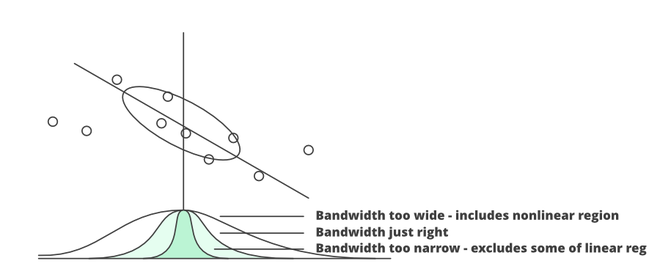

The Gaussian kernel plays a crucial role in Locally Weighted Regression (LWR) by determining the weights assigned to each training sample based on its proximity to the test sample. Here’s a deeper explanation of the Gaussian kernel and its relevance to LWR:

### Gaussian Kernel

The Gaussian kernel is a type of kernel function used in non-parametric regression methods like LWR. It assigns weights to data points based on their distance from a target point (in LWR, this is the test point for which we are making a prediction). The weight decreases exponentially as the distance increases, following the Gaussian (normal) distribution.

Mathematically, the weight $ w_i $ assigned to each training sample $ X_i $ given a test sample \( x \) and a bandwidth parameter $ \tau $ is calculated as:

$ w_i = \exp \left( -\frac{\| X_i - x \|^2}{2 \tau^2} \right) $

where:
- $ \| X_i - x \|^2 $ is the squared Euclidean distance between $  X_i $ and \( x \).
- $\tau$ (bandwidth parameter) controls the width of the Gaussian kernel and determines how fast the weights decay with distance.

In [22]:
# Necessary imports
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
%matplotlib inline
output_notebook()
# plt.style.use('seaborn-dark')

# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
	# add bias term
	x0 = np.r_[1, x0]
	X = np.c_[np.ones(len(X)), X]

	# fit model: normal equations with kernel
	xw = X.T * weights_calculate(x0, X, tau)
  # np.linalg.pinv computes the Moore-Penrose pseudo-inverse of a matrix.
  # It allows you to solve systems of linear equations, even if the matrix is not invertible.
  # The pseudo-inverse is widely used in least squares regression and other applications where a direct inverse doesn't exist,
  # providing a solution that minimizes error or optimizes a given criterion.
	theta = np.linalg.pinv(xw @ X) @ xw @ Y
	# "@" is used to
	# predict value
	return x0 @ theta

# function to perform weight calculation
def weights_calculate(x0, X, tau):
	return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))

# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
	# prediction
	domain = np.linspace(-3, 3, num=300)
	prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]

	plot = figure(width=400,height=400)
	plot.title.text = 'tau=%g' % tau
	plot.scatter(X, Y, alpha=.3)
	plot.line(domain, prediction, line_width=2, color='red')

	return plot

#define distribution
n = 1000

# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1)

# jitter X
X += np.random.normal(scale=.1, size=n)


In [23]:
# show the plots for different values of Tau
show(gridplot([
	[plot_lwr(10.), plot_lwr(1.)],
	[plot_lwr(0.1), plot_lwr(0.01)]
]))

R² Score: 0.5059


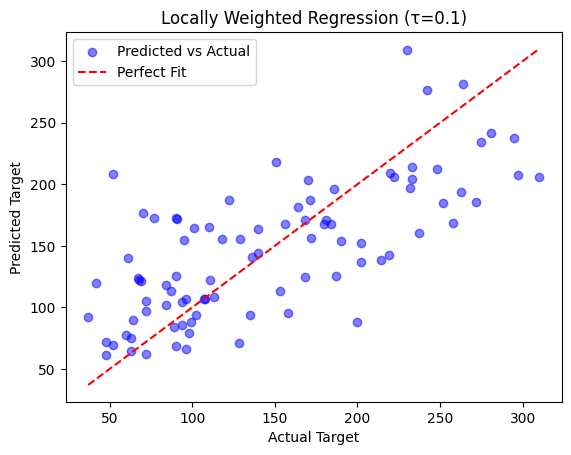

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data  # Use all features
y = diabetes.target

# Function for Locally Weighted Regression
def locally_weighted_regression(X_train, y_train, X_test, tau=0.1):
    m, n = X_train.shape  # m = number of samples, n = number of features
    y_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        x = X_test[i]  # Single test sample (1D array)

        # Compute weights using a Gaussian kernel
        weights = np.exp(-np.sum((X_train - x) ** 2, axis=1) / (2 * tau ** 2))
        W = np.diag(weights)  # Convert to diagonal matrix

        # Add intercept term
        X_aug = np.column_stack((np.ones(m), X_train))  # Shape: (m, n+1)
        x_aug = np.insert(x, 0, 1)  # Add bias term, Shape: (n+1,)

        # Compute theta using weighted normal equation
        theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ X_aug.T @ W @ y_train

        # Predict for the test point
        y_pred[i] = np.dot(x_aug, theta)

    return y_pred

# Train-test split for evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict using LWR
tau = 0.1  # Bandwidth parameter (tune this)
y_pred = locally_weighted_regression(X_train, y_train, X_test, tau)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label='Perfect Fit')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title(f"Locally Weighted Regression (τ={tau})")
plt.legend()
plt.show()
